Błąd przy zdj 666.jpg: cannot identify image file './Datasets/Petimages/Cat\\666.jpg'
Błąd przy zdj Thumbs.db: cannot identify image file './Datasets/Petimages/Cat\\Thumbs.db'
Błąd przy zdj 11702.jpg: cannot identify image file './Datasets/Petimages/Dog\\11702.jpg'


C:\Users\Bartosz Kebel\AppData\Roaming\Python\Python313\site-packages\PIL\TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))


Błąd przy zdj Thumbs.db: cannot identify image file './Datasets/Petimages/Dog\\Thumbs.db'


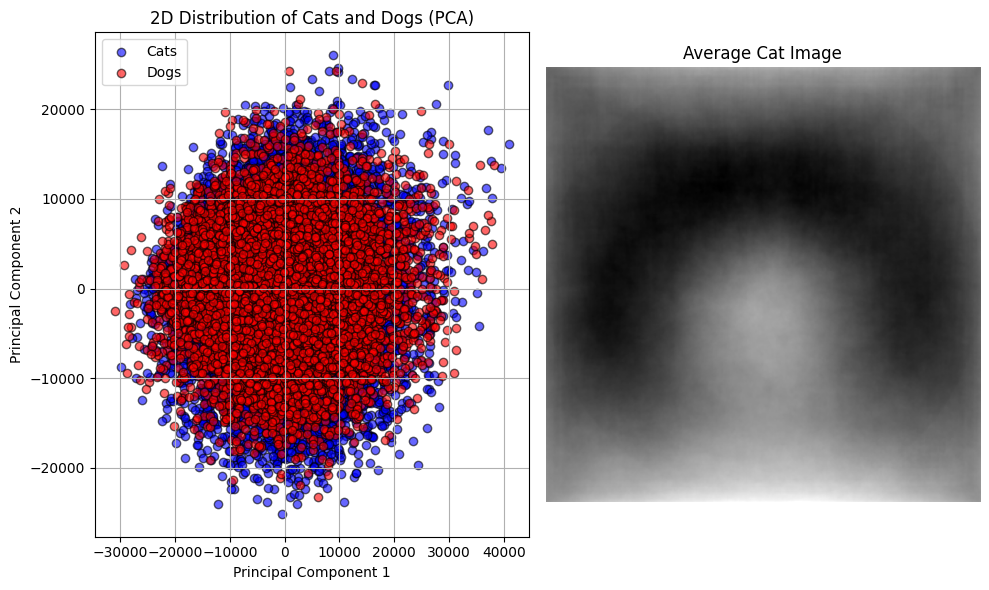

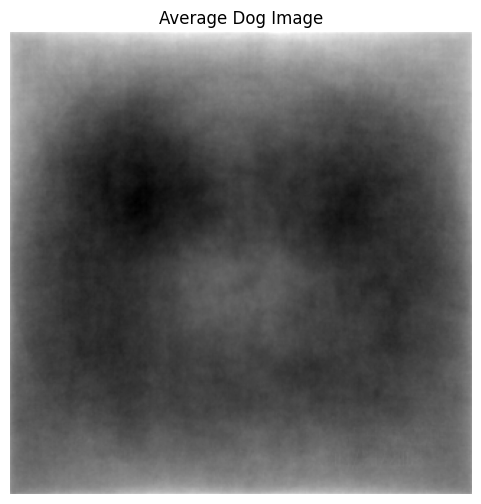

In [2]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from preprocess import folder_of_images_to_array_of_images

# Process Cats
cat_folder_path = './Datasets/Petimages/Cat'
cat_images = folder_of_images_to_array_of_images(cat_folder_path, (320, 320), True)
scaler_cat = StandardScaler()
cat_images_scaled = scaler_cat.fit_transform(cat_images)
pca_cat = PCA(n_components=2)
# nie scalowane bo wtedy tracimy to co chcieliśmy zobaczyc czyli jak bardzo rozróżnialne sa psy i koty
cat_images_2d = pca_cat.fit_transform(cat_images)

# Compute the "average cat"
average_image_scaled_cat = scaler_cat.mean_
average_image_unscaled_cat = scaler_cat.inverse_transform(average_image_scaled_cat.reshape(1, -1))
average_image_reshaped_cat = average_image_unscaled_cat.flatten().reshape(320, 320)

# Process Dogs
dog_folder_path = './Datasets/Petimages/Dog'
dog_images = folder_of_images_to_array_of_images(dog_folder_path, (320, 320), True)
scaler_dog = StandardScaler()
dog_images_scaled = scaler_dog.fit_transform(dog_images)
pca_dog = PCA(n_components=2)
# nie scalowane bo wtedy tracimy to co chcieliśmy zobaczyc czyli jak bardzo rozróżnialne sa psy i koty
dog_images_2d = pca_dog.fit_transform(dog_images)

# Compute the "average dog"
average_image_scaled_dog = scaler_dog.mean_
average_image_unscaled_dog = scaler_dog.inverse_transform(average_image_scaled_dog.reshape(1, -1))
average_image_reshaped_dog = average_image_unscaled_dog.flatten().reshape(320, 320)

# Plot Cats and Dogs on the Same Plot
plt.figure(figsize=(10, 6))

# Plot 2D Distribution of Cats and Dogs
plt.subplot(1, 2, 1)  # 1 row, 2 columns, this is the first subplot
plt.scatter(cat_images_2d[:, 0], cat_images_2d[:, 1], alpha=0.6, label='Cats', color='blue', edgecolor='k')
plt.scatter(dog_images_2d[:, 0], dog_images_2d[:, 1], alpha=0.6, label='Dogs', color='red', edgecolor='k')
plt.title("2D Distribution of Cats and Dogs (PCA)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend()
plt.grid(True)

# Plot the Average Cat and Dog Images
plt.subplot(1, 2, 2)  # 1 row, 2 columns, this is the second subplot
plt.imshow(average_image_reshaped_cat, cmap='gray')
plt.title("Average Cat Image")
plt.axis('off')

# Show both plots
plt.tight_layout()
plt.show()

# Plot the Average Dog Image
plt.figure(figsize=(6, 6))
plt.imshow(average_image_reshaped_dog, cmap='gray')
plt.title("Average Dog Image")
plt.axis('off')
plt.show()



# Prosty wniosek jest taki że koty i psy główne cechy mają podobne więc musimy poszukać cech bardziej wyróżniających